In [21]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.api.models import Model
from keras.api.optimizers import Adam
from keras.api.applications import VGG16
from keras.api.preprocessing import image
from keras.api.layers import Dense, Dropout,GlobalAveragePooling2D
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

In [22]:
# dataset directories
train_dir = '/home/arham/Desktop/react/training_set'
validation_dir = '/home/arham/Desktop/react/validation_set'

In [23]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Data augmentation for validation set
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [24]:
# Create a data generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
# Create a data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


Found 50 images belonging to 2 classes.


In [25]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# display the model summary
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
     
)


Epoch 1/15


/home/arham/anaconda3/envs/Ai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.5599 - loss: 0.7192 - val_accuracy: 0.6400 - val_loss: 0.5652
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7259 - loss: 0.5363 - val_accuracy: 0.7400 - val_loss: 0.5396
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7551 - loss: 0.4875 - val_accuracy: 0.7800 - val_loss: 0.4471
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.8260 - loss: 0.4064 - val_accuracy: 0.8800 - val_loss: 0.3798
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.8489 - loss: 0.3553 - val_accuracy: 0.8200 - val_loss: 0.4186
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.8758 - loss: 0.3330 - val_accuracy: 0.8200 - val_loss: 0.3699
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.8786 - loss: 0.3112 - val_accuracy: 0.8000 - val_loss: 0.4238
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.8518 - loss: 0.3319 - val_accuracy: 0.8200 - val_loss: 0.3985
Epo

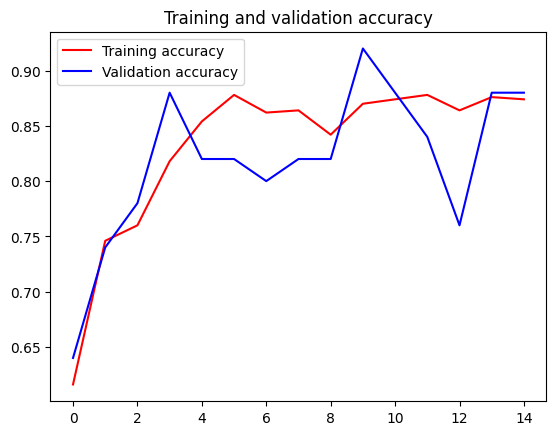

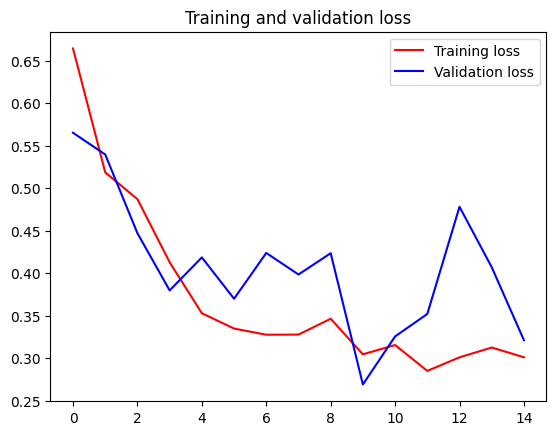

In [27]:
# Ploting the acurracy and loss 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()


In [28]:
# pre-process the image for prediction 
def preprocess_image(img_path):

    img = image.load_img(img_path, target_size=(150, 150)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    
    return img_array


In [29]:
# display images with labels
def display_image_with_label(img_path, label):

    img = image.load_img(img_path, target_size=(150, 150))  
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Image: 250.jpg
Prediction score: 0.9998149871826172
Predicted label: Dog


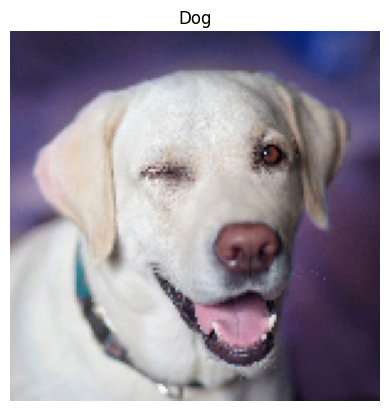

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Image: 252.jpg
Prediction score: 0.856178343296051
Predicted label: Dog


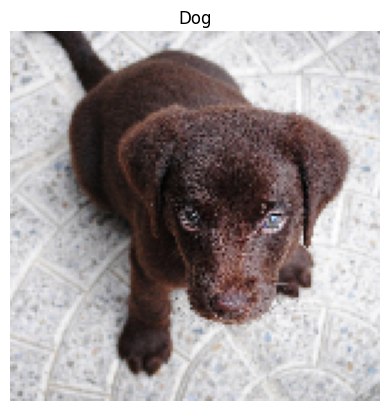

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Image: 253.jpg
Prediction score: 0.05354690924286842
Predicted label: Cat


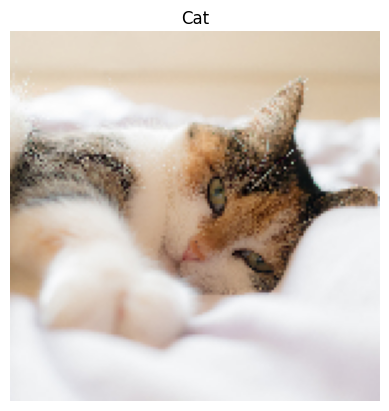

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Image: 251.jpg
Prediction score: 0.043754082173109055
Predicted label: Cat


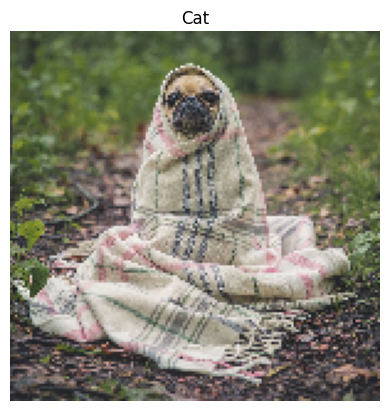

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Image: 258.jpg
Prediction score: 0.5308812260627747
Predicted label: Dog


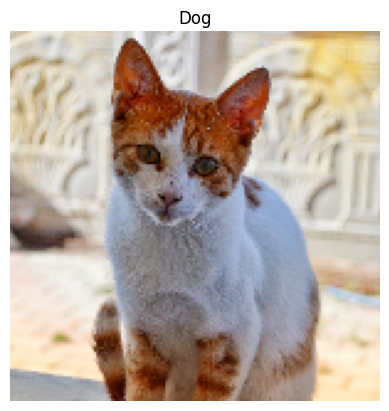

In [30]:
# Directory containing images for prediction 
img_dir = '/home/arham/Desktop/react/test_images'  

# Get list of image files
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]


# Display and predict the first five images
for img_file in img_files[:5]:
    img_path = os.path.join(img_dir, img_file)
    preprocessed_image = preprocess_image(img_path)

    # Predict the class of the image
    prediction = model.predict(preprocessed_image)

    # setting threshold to clasify images
    threshold = 0.5
    if prediction < threshold:
        predicted_label = "Cat"
    else:
        predicted_label = "Dog"

    print(f"Image: {img_file}")
    print(f"Prediction score: {prediction[0][0]}")
    print(f"Predicted label: {predicted_label}")

    # Display the image with the predicted label
    display_image_with_label(img_path, predicted_label)
